### Housing data linear regression complete implementation

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
#import seaborn as sns # seaborn data
import matplotlib.pyplot as plt
%matplotlib inline
import os

In [2]:
df = pd.read_csv('C://Users//admin//Downloads//housing.csv')

In [3]:
type(df)

pandas.core.frame.DataFrame

In [4]:
df.describe()  #non desccriptive

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [5]:
df.info()  # complete data info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  int64  
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


# In the given datasets we have 9 continuous variables and one categorical variable. 
# So, we will convert the categorical data. 


In [5]:
df.columns  #list of columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [6]:
df.corr()  # Correlation only considers numerical/continuous variables ocean proximity is omitted in identifying correlation

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000


In [7]:
df.ocean_proximity.value_counts()  # ocean proximity column record count grouping

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000B32FB48>,
      dtype=object)

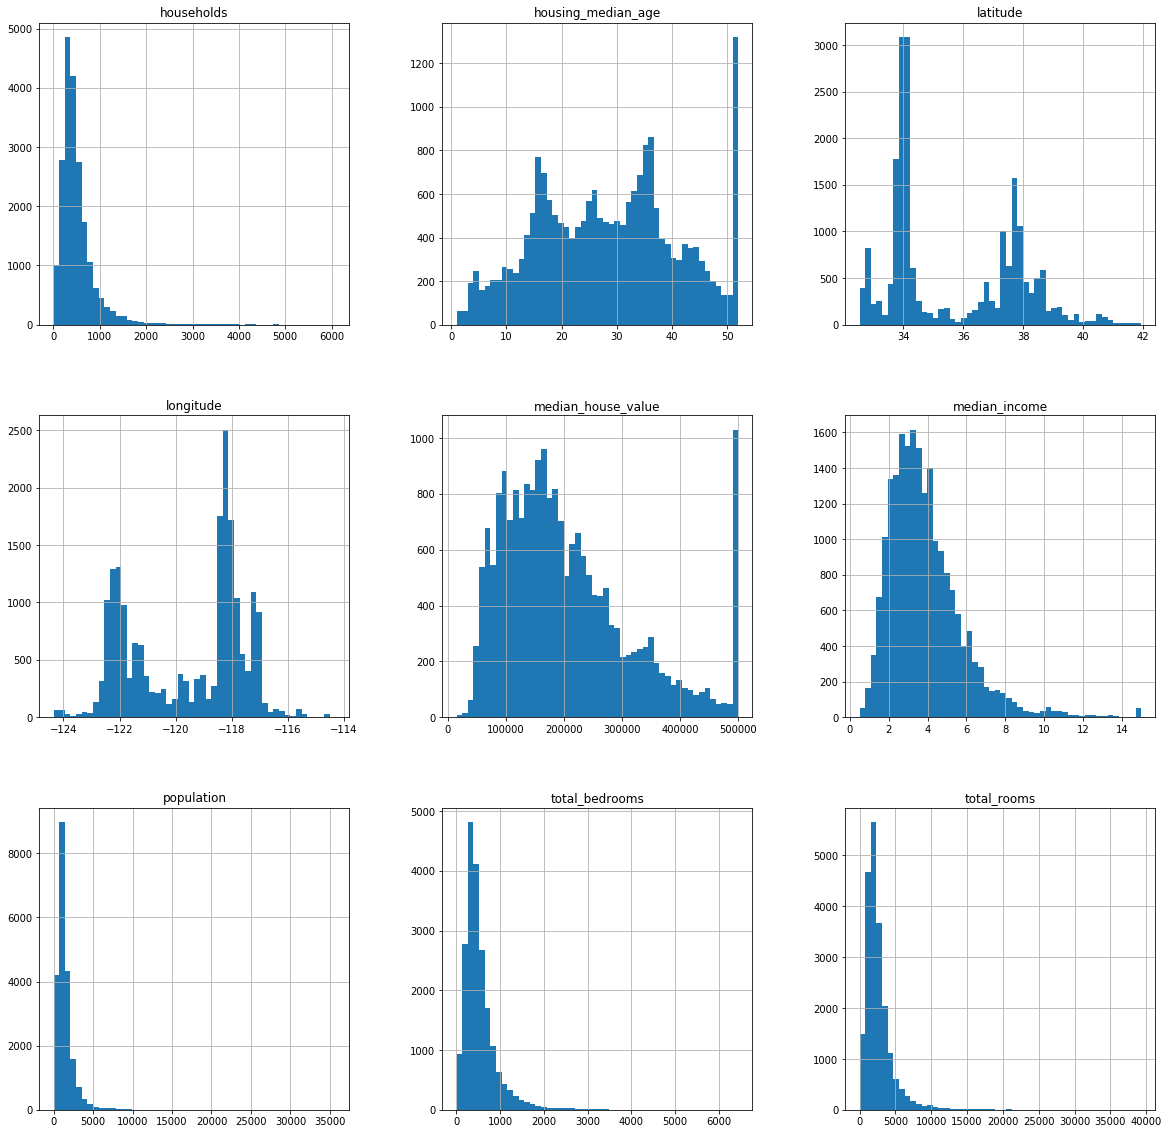

In [8]:
df.hist(bins=50, figsize=(20,20))

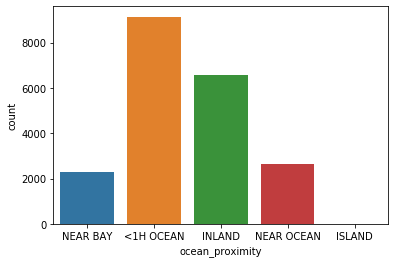

In [9]:
#Visulaization of ocean proximity
sns.countplot(df.ocean_proximity)

In [10]:
#scaling ocean proximity from categorical to numerical using get_dummies
#The get_dummies() function is used to convert categorical variable into dummy/indicator variables.
new_val = pd.get_dummies(df.ocean_proximity)

In [11]:
new_val # the categorical data is divided into 5 columns

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,0,0,0,1,0
1,0,0,0,1,0
2,0,0,0,1,0
3,0,0,0,1,0
4,0,0,0,1,0
...,...,...,...,...,...
20635,0,1,0,0,0
20636,0,1,0,0,0
20637,0,1,0,0,0
20638,0,1,0,0,0


In [12]:
new_val.columns # as the data is 

Index(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'], dtype='object')

In [13]:
df[new_val.columns] = new_val #the converted ocean proximity values added to the data set

In [14]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909,0.442636,0.317393,0.000242,0.110950,0.128779
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874,0.496710,0.465473,0.015563,0.314077,0.334963
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000,1.000000,1.000000,0.000000,0.000000,0.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  int64  
 9   ocean_proximity     20640 non-null  object 
 10  <1H OCEAN           20640 non-null  uint8  
 11  INLAND              20640 non-null  uint8  
 12  ISLAND              20640 non-null  uint8  
 13  NEAR BAY            20640 non-null  uint8  
 14  NEAR OCEAN          20640 non-null  uint8  
dtypes: float64(4), int64(5), object(1), uint8(5)
memory u

In [16]:
#lets check the correlation by plotting

In [17]:
df.corr() #New columns of ocean proximity are being considered in finding the correlation

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.045967,0.321121,-0.055575,0.009446,-0.474489,0.045509
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.144160,-0.446969,0.351166,-0.016572,0.358771,-0.160818
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623,0.045300,-0.236645,0.017020,0.255172,0.021622
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153,-0.003031,0.025624,-0.007572,-0.023022,-0.009175
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686,0.018314,-0.006463,-0.004361,-0.019873,0.000679
population,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650,0.074613,-0.020732,-0.010412,-0.060880,-0.024264
households,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843,0.042435,-0.039402,-0.009077,-0.010093,0.001714
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075,0.168876,-0.237496,-0.009228,0.056197,0.027344
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000,0.256617,-0.484859,0.023416,0.160284,0.141862
<1H OCEAN,0.321121,-0.446969,0.045300,-0.003031,0.018314,0.074613,0.042435,0.168876,0.256617,1.000000,-0.607669,-0.013872,-0.314813,-0.342620


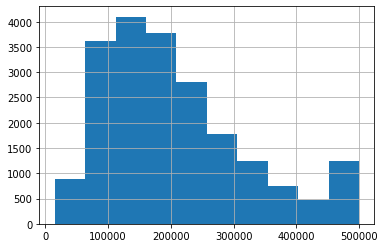

In [18]:
df.median_house_value.hist()  # the most of the medain house price lies between 100000 and 300000

In [19]:
#identify the null values in the given data set
df.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
<1H OCEAN               0
INLAND                  0
ISLAND                  0
NEAR BAY                0
NEAR OCEAN              0
dtype: int64

In [20]:
#only total_bedroom has 207 records with nulls
print(df.median_house_value.mean())
print(df.median_house_value.median())
print(df.median_house_value.mode())


206855.81690891474
179700.0
0    500001
dtype: int64


In [21]:
#most of the housing price is falling between 100000 and 300000
#we can consider either of mean or median
#which is the best choice do we have any measure for treating missing value in this scenario
#whats the criteria for dropping the data points with null values?
df = df.fillna(df.mean()) # treating with null values

In [22]:
df.isna().sum()  #result no null values in entire data set

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
<1H OCEAN             0
INLAND                0
ISLAND                0
NEAR BAY              0
NEAR OCEAN            0
dtype: int64

###Data Scalling

In [23]:
original_data = df.copy()  #retain a data copy of original data

In [24]:
label = df.median_house_value

In [25]:
feature = df.drop(['median_house_value'], axis=1)

In [26]:
feature

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,0,0,0,1,0
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,0,0,0,1,0
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,0,0,0,1,0
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,0,0,0,1,0
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25,1665,374.0,845,330,1.5603,INLAND,0,1,0,0,0
20636,-121.21,39.49,18,697,150.0,356,114,2.5568,INLAND,0,1,0,0,0
20637,-121.22,39.43,17,2254,485.0,1007,433,1.7000,INLAND,0,1,0,0,0
20638,-121.32,39.43,18,1860,409.0,741,349,1.8672,INLAND,0,1,0,0,0


In [27]:
feature = df.drop(['ocean_proximity'], axis=1)

In [28]:
from sklearn import preprocessing  #for data scalling
convert = preprocessing.StandardScaler() 

In [29]:
featureT = convert.fit_transform(feature.values)

In [30]:
type(featureT)

numpy.ndarray

In [31]:
labelT = convert.fit_transform(df.median_house_value.values.reshape(-1,1)).flatten()

In [32]:
labelT

array([ 2.12963148,  1.31415614,  1.25869341, ..., -0.99274649,
       -1.05860847, -1.01787803])

In [33]:
#Split the data into Train and Test
from sklearn.model_selection import train_test_split
feature_train, feature_test,label_train, label_test = train_test_split(featureT,labelT, test_size=0.2, random_state=42) 

In [34]:
from sklearn import linear_model
linear_reg = linear_model.LinearRegression()
linear_reg.fit(feature_train,label_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [35]:
linear_reg

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [36]:
linear_reg.coef_

array([ 1.87652249e-15,  3.04118498e-15,  6.24743773e-16, -6.57193936e-16,
        1.25361624e-15,  3.20586540e-16, -5.61301623e-16,  1.05172887e-15,
        1.00000000e+00, -9.12510349e-02, -8.55124207e-02, -2.85905530e-03,
       -5.76993728e-02, -6.15363597e-02])

In [37]:
linear_reg.predict(feature_test)  # predicted test values

array([-1.37925233, -1.39571783,  2.54041094, ...,  2.54041094,
       -1.16606749, -0.4797163 ])

In [38]:
label_test  #actual labels

array([-1.37925233, -1.39571783,  2.54041094, ...,  2.54041094,
       -1.16606749, -0.4797163 ])

In [39]:
plt.scatter(y_test,linear_reg.predict(feature_test))
plt.grid()
plt.xlabel('Actual y')
plt.ylabel('Predicted y')
plt.title('scatter plot between actual y and predicted y')
plt.show()
print('Mean Squared Error :',mean_squared_error(y_test, clf_.predict(feature_test)))
print('Mean Absolute Error :',mean_absolute_error(y_test, clf_.predict(feature_test)))

NameError: name 'y_test' is not defined

In [140]:
#calculate the weights and predict the median housing price using SGD Regressor
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, random_state=42)
sgd_reg.fit(feature_train,label_train)

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.01, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty='l2', power_t=0.25, random_state=42,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [141]:
label_test_1 = sgd_reg.predict(feature_test)

In [142]:
label_test_1

array([ -5.29664327,  -4.40637654, -83.8828053 , ...,  -1.65396504,
        -3.91860949,  22.96518026])

In [118]:
label_test

array([-1.37925233, -1.39571783,  2.54041094, ...,  2.54041094,
       -1.16606749, -0.4797163 ])